<a href="https://colab.research.google.com/github/Parthshh19/Restaurant-Ratings-Prediction/blob/main/Theme_Park_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Theme Park Reviews Analysis

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


**Problem Definition in Business Terms:**

The aim of this project is to analyze customer reviews from three major theme park branches (California, Paris, and Hong Kong) to understand visitor demographics, peak visiting times, overall sentiments, and specific concerns or interests. The ultimate goal is to provide actionable insights that can enhance customer satisfaction, optimize marketing strategies, and improve overall park operations.

**Proposed Approaches:**



1.   Data Exploration: Analyzing visitor demographics and peak visiting times for each branch.
2.   Sentiment Analysis: Assessing overall customer sentiments towards the theme parks and specifically their services.
3.   Topic Modeling: Identifying and interpreting key concerns and interests of customers using LDA.

**Major Findings:**

*  Visitor Demographics: California predominantly attracts visitors from the
United States, while Hong Kong has a more diverse visitor base from neighboring Asian countries, and Paris draws many visitors from the United Kingdom.

*  Visiting Patterns: Domestic visitors peak during summer (June and July), while international visitors peak in late summer and early fall (August and September) in California.

*  Sentiments: Hong Kong received the most positive overall sentiments, while California was praised the most for its services.

*  Customer Concerns: Key concerns include accessibility, employee interactions, and basic amenities like toilets and dining options.

These findings help address the business problem by providing insights into visitor behavior and preferences, enabling targeted improvements in marketing, customer service, and operational efficiency.

<a id = "cell_exploration"></a>
### 2. Data Exploration


Loading the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('ThemeParkReviews.csv')

In [ ]:
print(df.head())

   Review_ID Year_Month Reviewer_Location  \
0  148524565    2012-12     United States   
1  346403028     2015-3     United States   
2  284580024     2015-6     United States   
3  410306562    2015-12            Canada   
4  358484811     2015-7     United States   

                                                                                                                                                                                               Review_Text  \
0  Loved seeing the Christmas lights at the park, but the crowds were the worst we had ever seen. We have been to Disneyland many times and have experienced long wait times in the past, but this visi...   
1                                                                       I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it, of course.   
2  Went to Disneyland for one day. We arrive at opening and left at midnight. We loved all it had to offer. My 

In [ ]:
print('Number of rows', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows 35000
Number of columns: 5


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          35000 non-null  int64 
 1   Year_Month         35000 non-null  object
 2   Reviewer_Location  35000 non-null  object
 3   Review_Text        35000 non-null  object
 4   Branch             35000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB
None


This indicates that there are no null values

Now we will create a new column for the review word count after cleaning the text to see if there is a difference in the review word length for different branches

In [ ]:
#Defind a function to clean text
def preprocess(Review_Text):
    Review_Text = Review_Text.str.replace("(<br/>)", "")
    Review_Text = Review_Text.str.replace('(<a).*(>).*(</a>)', '')
    Review_Text = Review_Text.str.replace('(&amp)', '')
    Review_Text = Review_Text.str.replace('(&gt)', '')
    ReviewText = Review_Text.str.replace('(&lt)', '')
    Review_Text = Review_Text.str.replace('(\xa0)', ' ')
    Review_Text = Review_Text.str.replace(',', ' ')
    return Review_Text

df['Review_Text'] = preprocess(df['Review_Text']) #Clean text

In [ ]:
#Create new feature for the word count of the review.
df['word_count'] = df['Review_Text'].apply(lambda x: len(str(x).split()))

#### Visualisations

We need to load `matplotlib` library

In [ ]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

<ipython-input-243-ed2016ba4b5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Branch', y='word_count', data=df, palette="pastel", width=0.6)  # Changed palette


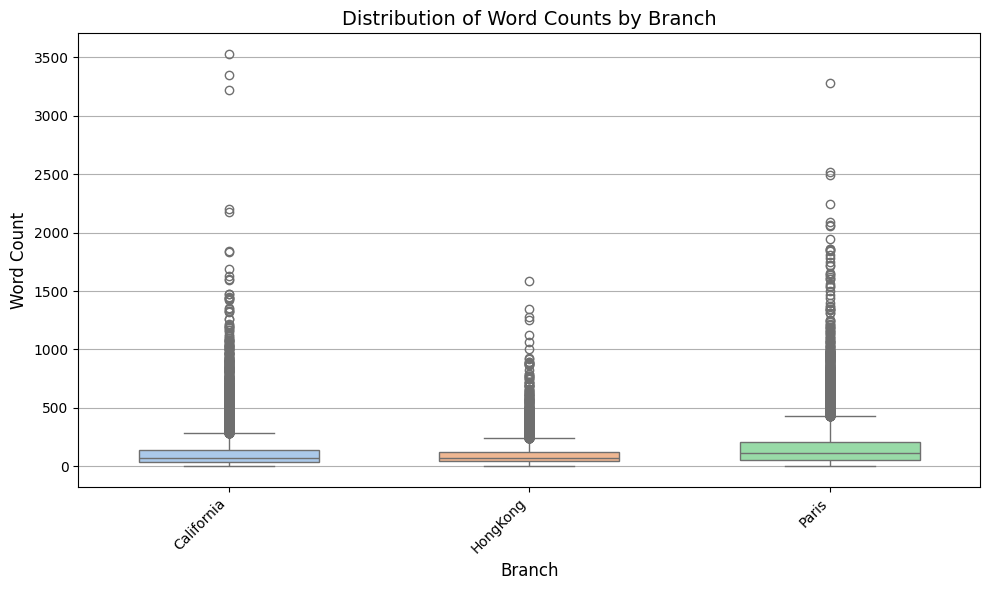

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='word_count', data=df, palette="pastel", width=0.6)  # Changed palette
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.title('Distribution of Word Counts by Branch', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

From the box plot we can infer that there are a large number of outliers. Some people have given really elaborate reviews. People tend to give more elaborate reviews on average at the Paris branch

<Axes: ylabel='Branch'>

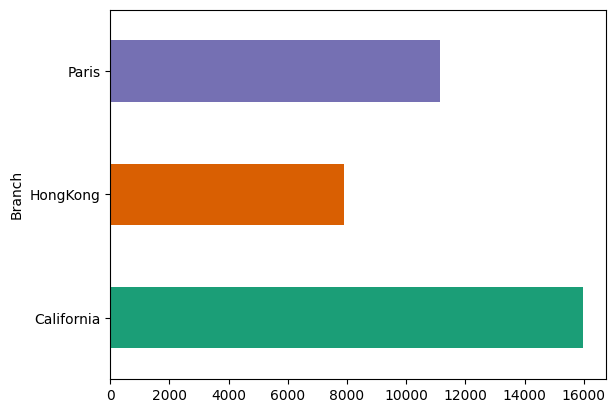

In [ ]:
df.groupby('Branch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


California branch has the highest number of reviews which is almost twice of the Hong Kong branch

#### Part A

Top 10 Reviewer Locations for California Branch

<ipython-input-245-4ca5ac72b245>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_california_locations.values, y=top_10_california_locations.index, palette='viridis')


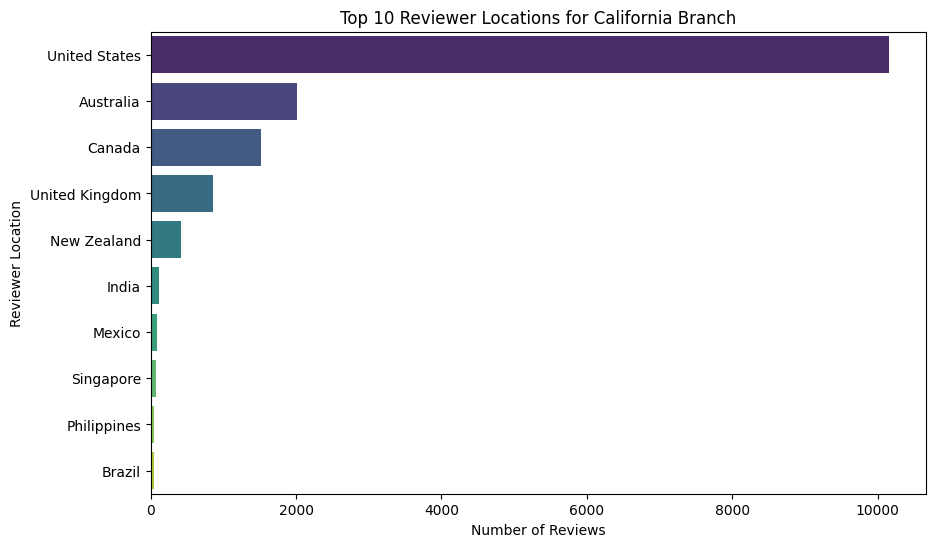

In [ ]:
# Filter data for the California branch
california_data = df[df['Branch'] == 'California']

# Group and count reviewer locations for the California branch
california_reviewer_counts = california_data.groupby(['Reviewer_Location']).size()

# Sort in descending order and get the top 10
top_10_california_locations = california_reviewer_counts.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 California reviewer locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_california_locations.values, y=top_10_california_locations.index, palette='viridis')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Location')
plt.title('Top 10 Reviewer Locations for California Branch')
plt.show()

Top 10 Reviewer Locations for Paris Branch

Reviewer_Location
United Kingdom    6574
United States     1078
Australia          496
Ireland            344
India              246
Canada             154
Netherlands        150
France             148
Belgium            112
Germany            105
dtype: int64


<ipython-input-246-92a4058fa416>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_paris_locations.values, y=top_10_paris_locations.index, palette='viridis')


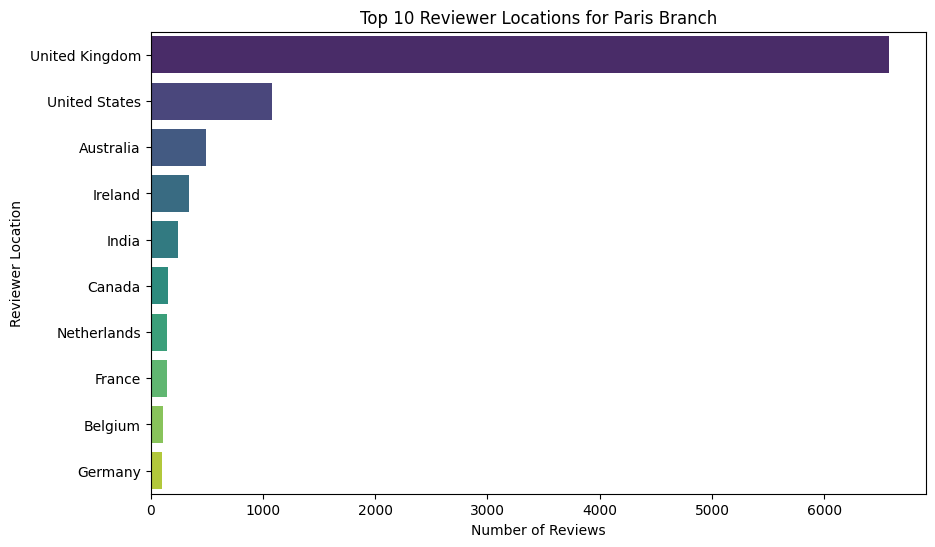

In [ ]:
# Filter data for the Paris branch
paris_data = df[df['Branch'] == 'Paris']

# Group and count reviewer locations for the Paris branch
paris_reviewer_counts = paris_data.groupby(['Reviewer_Location']).size()

# Sort in descending order and get the top 10
top_10_paris_locations = paris_reviewer_counts.sort_values(ascending=False).head(10)

print(top_10_paris_locations)

# Create a bar plot for the top 10 Paris reviewer locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_paris_locations.values, y=top_10_paris_locations.index, palette='viridis')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Location')
plt.title('Top 10 Reviewer Locations for Paris Branch')
plt.show()

Top 10 Reviewer Locations for Hong Kong Branch

<ipython-input-247-eb9bed9a0d25>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_hk_locations.values, y=top_10_hk_locations.index, palette='viridis')


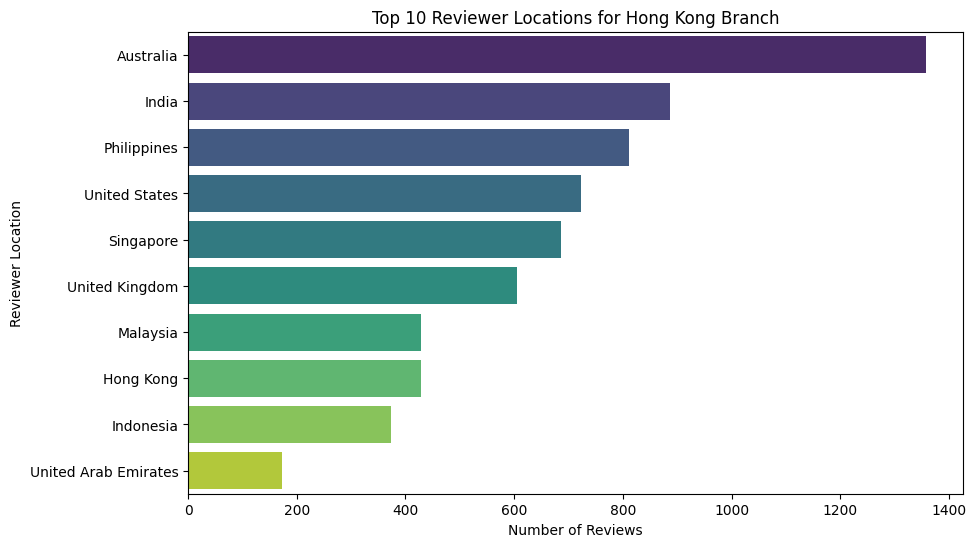

In [ ]:
# Filter data for the Hong Kong branch
hk_data = df[df['Branch'] == 'HongKong']

# Group and count reviewer locations for the Hong Kong branch
hk_reviewer_counts = hk_data.groupby(['Reviewer_Location']).size()

# Sort in descending order and get the top 10
top_10_hk_locations = hk_reviewer_counts.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 Hong Kong reviewer locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_hk_locations.values, y=top_10_hk_locations.index, palette='viridis')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Location')
plt.title('Top 10 Reviewer Locations for Hong Kong Branch')
plt.show()

Observations:
- **California** predominantly attracts visitors from the United States, Australia, and Canada.
- **Hong Kong** has a more diverse visitor base with significant contributions from Australia, India, and the Philippines.
- **Paris** has a strong visitor base from the United Kingdom and also attracts visitors from the United States and Australia.

Potential Reasons for Differences:
1. **Geographical Proximity**:
   - California attracts many visitors from the United States due to its location.
   - Hong Kong sees a significant number of visitors from neighboring Asian countries reflecting its accessibility and appeal to tourists from nearby regions.
   - Paris attracts a large number of visitors from the United Kingdom due to its proximity.

2. **Cultural and Historical Ties**:
   - Paris, being a major tourist destination in Europe, attracts many visitors from European countries.
   - Hong Kong's diverse visitor base might be influenced by its status as an international business hub.

#### Part B

Line chart showing number of domestic and international visitors at California branch

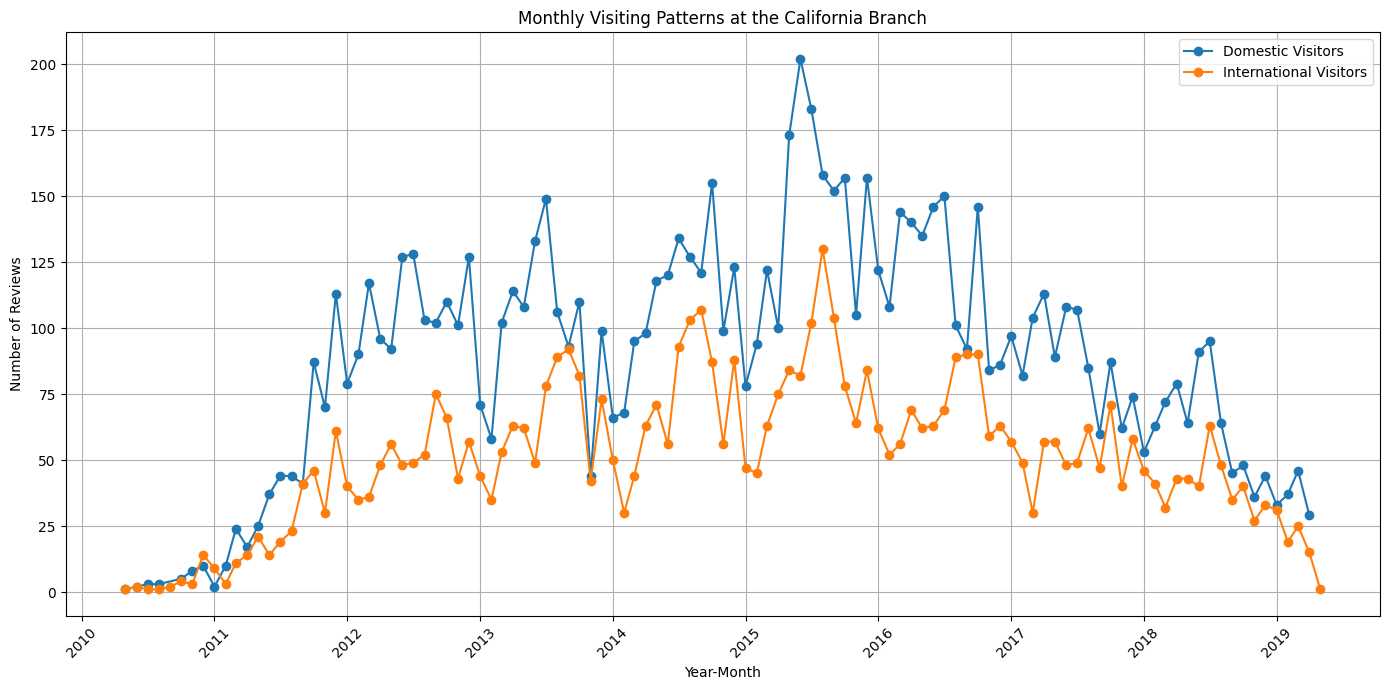

In [ ]:
# Filter data for the California branch
california_data = df[df['Branch'] == 'California']

# Separate domestic and international visitors
domestic_visitors = california_data[california_data['Reviewer_Location'] == 'United States']
international_visitors = california_data[california_data['Reviewer_Location'] != 'United States']

# Group and count the number of reviews per month for both groups
domestic_visits_per_month = domestic_visitors.groupby('Year_Month').size().reset_index(name='Review_Count')
international_visits_per_month = international_visitors.groupby('Year_Month').size().reset_index(name='Review_Count')

# Remove rows with invalid or missing Year_Month values
domestic_visits_per_month = domestic_visits_per_month[domestic_visits_per_month['Year_Month'] != 'missing']
international_visits_per_month = international_visits_per_month[international_visits_per_month['Year_Month'] != 'missing']

# Convert Year_Month to datetime again
domestic_visits_per_month['Year_Month'] = pd.to_datetime(domestic_visits_per_month['Year_Month'], errors='coerce')
international_visits_per_month['Year_Month'] = pd.to_datetime(international_visits_per_month['Year_Month'], errors='coerce')

# Sort by Year_Month
domestic_visits_per_month = domestic_visits_per_month.sort_values('Year_Month')
international_visits_per_month = international_visits_per_month.sort_values('Year_Month')

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(domestic_visits_per_month['Year_Month'], domestic_visits_per_month['Review_Count'], label='Domestic Visitors', marker='o')
plt.plot(international_visits_per_month['Year_Month'], international_visits_per_month['Review_Count'], label='International Visitors', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.title('Monthly Visiting Patterns at the California Branch')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Bar chart showing number of domestic and international visitors at California branch in each month

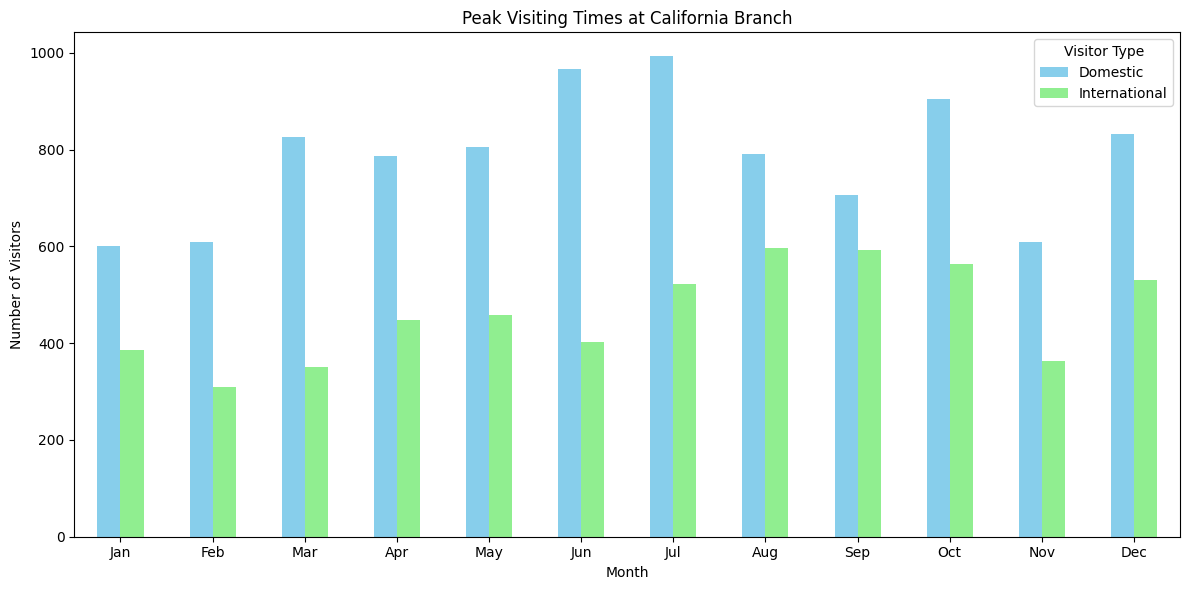

Visitor_Type  Domestic  International
Month                                
1.0                601            386
2.0                610            309
3.0                826            350
4.0                786            447
5.0                805            458
6.0                966            402
7.0                993            523
8.0                791            597
9.0                706            593
10.0               905            564
11.0               609            364
12.0               833            531


In [ ]:
# Filter for the California branch
california_df = df[df['Branch'] == 'California'].copy()

# Defining domestic and international visitors
domestic_countries = ['United States']  # Define other domestic countries if applicable
california_df.loc[:, 'Visitor_Type'] = california_df['Reviewer_Location'].apply(lambda x: 'Domestic' if x in domestic_countries else 'International')

# Handling missing or invalid date values in the Year_Month column
california_df['Year_Month'] = california_df['Year_Month'].apply(lambda x: pd.NaT if x == 'missing' else x)

# Extract the month from the Year_Month column
california_df['Month'] = pd.to_datetime(california_df['Year_Month'], errors='coerce').dt.month

# Grouping by month and visitor type, and count the number of reviews
monthly_visits = california_df.groupby(['Month', 'Visitor_Type']).size().reset_index(name='Count')

# Pivot the table for easier plotting
pivot_table = monthly_visits.pivot(index='Month', columns='Visitor_Type', values='Count').fillna(0)

# Plotting the peak visiting times
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for domestic and international visitors (or any colors you prefer)
colors = ['skyblue', 'lightgreen']

pivot_table.plot(kind='bar', ax=ax, color=colors)

ax.set_title('Peak Visiting Times at California Branch')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Visitors')
ax.legend(title='Visitor Type')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.tight_layout()
plt.show()

# Display the processed data
print(pivot_table)

**Domestic Visitors**
- **Peak Months**: June (966 visitors) and July (993 visitors)
- **Low Months**: February (610 visitors) and November (609 visitors)
- **General Pattern**: Domestic visits generally peak during the summer months (June and July) and maintain relatively high numbers through the early fall (October).

**International Visitors**
- **Peak Months**: August (597 visitors) and September (593 visitors)
- **Low Months**: February (309 visitors) and November (364 visitors)
- **General Pattern**: International visits see a distinct rise towards late summer and early fall (August and September), with numbers being lower during the winter and early spring months.

**Comparative Analysis and Potential Reasons**

1. **Seasonal Variations**:
   - **Domestic Visitors**: The highest numbers in June and July suggesting that domestic visitors are likely to travel more during their school holidays and summer breaks.
   - **International Visitors**: Peak visits in August and September might be influenced by international vacation schedules and favorable travel conditions post the peak domestic travel season.

2. **Weather Patterns**:
   - California's summer and early fall offer the best weather for travel, which is appealing to both domestic and international visitors. However, the preference for late summer by international visitors may reflect a desire to avoid the hottest months of July and early August.

3. **Holiday Seasons**:
   - The lower numbers in February for both groups might be due to the post-holiday travel slump, where both domestic and international tourists are less likely to travel right after the busy holiday season in December.

4. **Economic Factors**:
  - International visitors might plan their trips during off-peak times to take advantage of lower airfare and accommodation prices.


<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.(Amazon, 2023)

In [ ]:
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

message_text = df['Review_Text'][1]
print('Review Comment:\n', message_text)

Review Comment:
 I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it  of course.


#### Part C

Emotional detection sentiment analysis seeks to understand the psychological state of the individual behind a body of text, including their frame of mind when they were writing it and their intentions. [Sentiment Analysis? | IBM.2023]

In [ ]:
# Iterate over branches and calculate average sentiment scores
for branch in df['Branch'].unique():
    # Filter data for the current branch
    branch_reviews = df[df['Branch'] == branch]['Review_Text']

    # Initialize lists to store scores
    compound_scores = []
    neg_scores = []
    neu_scores = []
    pos_scores = []

    # Iterate over branch reviews and calculate sentiment scores
    for review in branch_reviews:
        scores = sid.polarity_scores(review)
        compound_scores.append(scores['compound'])
        neg_scores.append(scores['neg'])
        neu_scores.append(scores['neu'])
        pos_scores.append(scores['pos'])

    # Calculate average scores
    avg_compound = sum(compound_scores) / len(compound_scores)
    avg_neg = sum(neg_scores) / len(neg_scores)
    avg_neu = sum(neu_scores) / len(neu_scores)
    avg_pos = sum(pos_scores) / len(pos_scores)

    # Print average scores
    print(f"Average Sentiment Scores for {branch}:")
    print(f"Compound: {avg_compound}")
    print(f"Negative: {avg_neg}")
    print(f"Neutral: {avg_neu}")
    print(f"Positive: {avg_pos}")

Average Sentiment Scores for California:
Compound: 0.6959318210302022
Negative: 0.0368203408948488
Neutral: 0.7763472866273959
Positive: 0.18683368843213344
Average Sentiment Scores for HongKong:
Compound: 0.7083356082709625
Negative: 0.033798300139540716
Neutral: 0.7856927565647603
Positive: 0.1805147786375738
Average Sentiment Scores for Paris:
Compound: 0.6437027601039478
Negative: 0.04679442602383704
Neutral: 0.7920306479075212
Positive: 0.16117062460794015


Among the three theme parks, Hong Kong received the most positive sentiments with a compound sentiment score of 0.7083, slightly higher than California's 0.6959 and notably higher than Paris's 0.6437. The sentiment analysis shows that Hong Kong has the highest positive sentiment score (0.1805) and the lowest negative sentiment score (0.0338), indicating more favorable customer feedback overall. In contrast, Paris has the lowest compound and positive sentiment scores and the highest negative sentiment score (0.0468), suggesting comparatively less favorable customer experiences. Thus, Hong Kong emerges as the theme park with the most positive customer sentiments.

#### Part D

Aspect-Based Sentiment Analysis is defined as the process of identifying sentiment aspects in a text by focusing on specific aspects, sentiment polarity, and opinion terms related to the text.[K. Ezzameli, & Hela Mahersia. (2023)]

In [ ]:
#Define a function to compute overall sentiment by aspect
def aspect_sentiment(aspect,reviewtext):
    SentimentIndex = []

    # For each review in the data set
    for rev in (reviewtext):
        try:
            sens =  sent_tokenize(rev)
        except:
            continue
        #Compute sentiment scores by each sentence.
        ReviewLevelSentiment = []
        for s in range(len(sens)):
            IndexAspect = sens[s].find(aspect)
            if IndexAspect > 0:
                ReviewLevelSentiment.append(sid.polarity_scores(sens[s]))

        #Aggregate sentiment scores for each review
        try:
            Compound = mean([ReviewLevelSentiment[x]['compound'] for x in range(len(ReviewLevelSentiment))])
        except:
            Compound = 0

        # Generate sentiment index based on sentiment score
        SentimentIndex.append(Compound)

         # Define thresholds
        positive_threshold = 0.1
        negative_threshold = -0.1

        # Initialize counters
        positive_count = 0
        negative_count = 0

        for value in SentimentIndex:
            if value > positive_threshold:
                positive_count += 1
            elif value < negative_threshold:
                negative_count += 1
        Total_Count = positive_count + negative_count
    return [round(positive_count/Total_Count,2), round(negative_count/Total_Count,2)]

Sentiment scores for California:
services
[0.79, 0.21]
Sentiment scores for HongKong:
services
[0.75, 0.25]
Sentiment scores for Paris:
services
[0.69, 0.31]


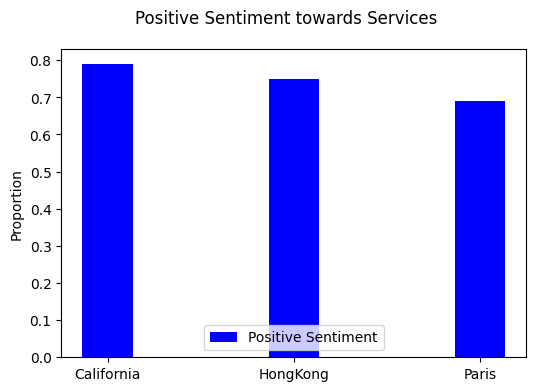

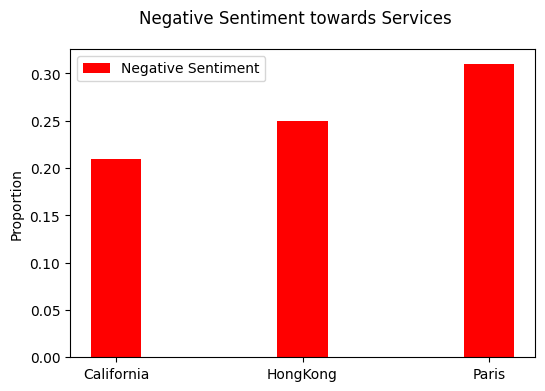

In [ ]:
# Define aspects to compute sentiment
aspect = 'services'

# Extract reviews for each branch and compute aspect sentiments
branches = ['California', 'HongKong', 'Paris']
SentimentScores = {branch: [] for branch in branches}

for branch in branches:
    print(f'Sentiment scores for {branch}:')
    BranchReviews = df.loc[df['Branch'] == branch]
    SentimentScores[branch] = aspect_sentiment(aspect, BranchReviews['Review_Text'])
    print(aspect)
    print(SentimentScores[branch])

# Plotting positive sentiment
PositiveSentiment = [SentimentScores[branch][0] for branch in branches]

ind = np.arange(len(branches))  # the x locations for the groups
width = 0.27  # the width of the bars

figPo = plt.figure(figsize=(6, 4))
ax = figPo.add_subplot(111)

rectsPositive = ax.bar(ind, PositiveSentiment, width, color='b')

ax.set_ylabel('Proportion')
ax.set_xticks(ind)
ax.set_xticklabels(branches)
ax.legend((rectsPositive[0],), ('Positive Sentiment',), loc='lower center')
plt.suptitle('Positive Sentiment towards Services')
plt.show()

# Plotting negative sentiment
NegativeSentiment = [SentimentScores[branch][1] for branch in branches]

figNeg = plt.figure(figsize=(6, 4))
ax = figNeg.add_subplot(111)

rectsNegative = ax.bar(ind, NegativeSentiment, width, color='r')

ax.set_ylabel('Proportion')
ax.set_xticks(ind)
ax.set_xticklabels(branches)
ax.legend((rectsNegative[0],), ('Negative Sentiment',), loc='upper left')
plt.suptitle('Negative Sentiment towards Services')
plt.show()

The theme park branch that received the most positive sentiment for their “services” is California, with a positive sentiment score of 0.79. This indicates that a higher proportion of reviews expressed positive sentiments towards services in the California branch compared to Hong Kong and Paris.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

Data Cleaning

In [ ]:
from nltk.stem import PorterStemmer #Stemming Package
import re  #Regular expression operation package

porter = PorterStemmer()

Reviews = df['Review_Text']
Cleaned_doc = []
for r in range(len(Reviews)):
    review = Reviews[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        for t in range(len(Tokens)):
           Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)

Next, we need to remove the *_stop-words_* from the text data as they are mostly clutter and hardly carry any information:

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using part of speech to extract nouns

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download the required resource for part-of-speech tagging
nltk.download('averaged_perceptron_tagger')

# Function to extract nouns from text
def extract_nouns(text):
    words = word_tokenize(text)
    words_pos = pos_tag(words)
    nouns = [word for word, pos in words_pos if pos.startswith('NN')]
    return ' '.join(nouns)

# Apply the function to the review text1
df['Nouns_Only'] = df['Review_Text'].apply(extract_nouns)

# Display the first few rows to ensure the nouns extraction is correct
df[['Review_Text', 'Nouns_Only']].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Review_Text  \
0  Loved seeing the Christmas lights at the park  but the crowds were the worst we had ever seen. We have been to Disneyland many times and have experienced long wait times in the past  but this visi...   
1                                                                       I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it  of course.   
2  Went to Disneyland for one day. We arrive at opening and left at midnight. We loved all it had to offer. My kids are older so we did not spend time waiting in line to meet characters. Use the fast...   
3  I travelled to Disneyland from Toronto in December 2015 for the very first time. It was EVERYthing that you can imagine. I've dreamed about that day since I was a little girl and was so happy I go...   
4  This place might be ok for families with kids. My wife and I went to remember our past experiences when things were much less expensive. The park is packed with guests and hard to navigate. Prices...   

                                                                                                                                                                                                Nouns_Only  
0                                           Christmas lights park crowds Disneyland times times visit crowds crowds people wheel chairs entry park people time people lights decorations Christmas holiday  
1                                                                                                                                                      Disneyland point day couple days family kids course  
2                                                        Went Disneyland day opening midnight kids time line characters passes day reason parks Day way day night activities fireworks parade magic Disney  
3  Disneyland Toronto December time day girl Birthday boyfriend reservations Birthday Dinner Goofy Kitchen dinner buffet food Disney characters fun laughter characters juts photos guests.The rides Di...  
4                                                    place families kids wife experiences things park guests Prices food parking entrance fees value kids experience bit attractions repair advance notice

Latent Dirichlet Allocation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<35000x22878 sparse matrix of type '<class 'numpy.int64'>'
	with 1551294 stored elements in Compressed Sparse Row format>

Visualise the most common words:

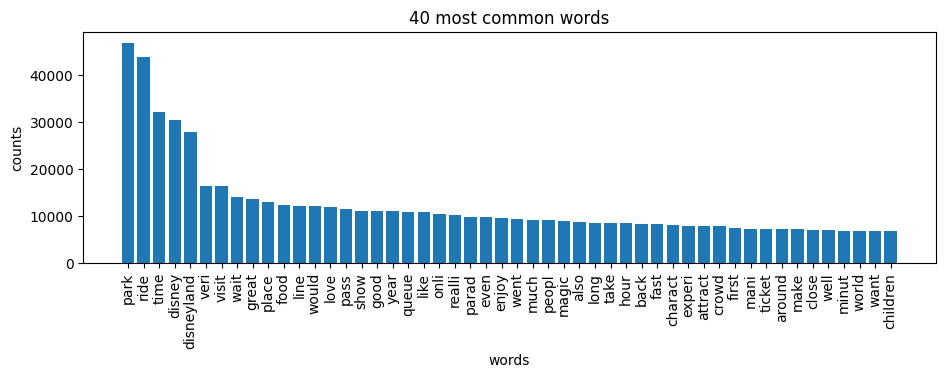

In [ ]:
terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

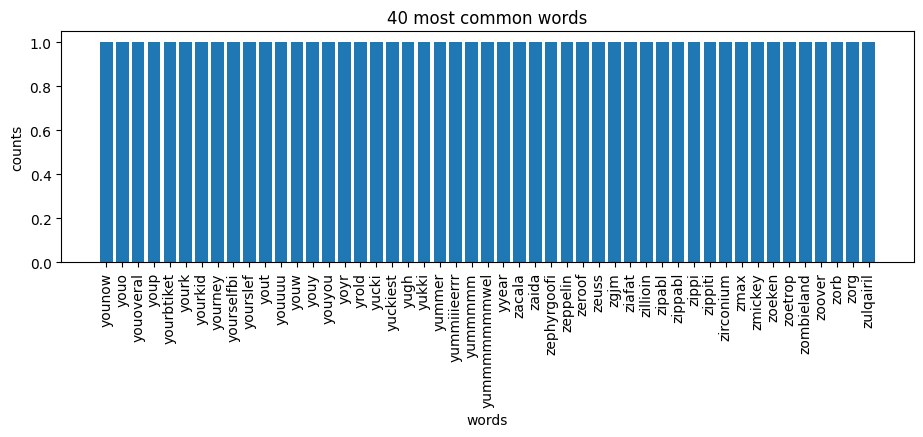

In [ ]:
terms = count_vectorizer.get_feature_names_out()

# Count the least popular of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[-50:-1] #Take the bottom 50 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 least common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

Term Selection

In [ ]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]
ReducedCount

Number of Terms Remained:  2005


<35000x2005 sparse matrix of type '<class 'numpy.int64'>'
	with 440646 stored elements in Compressed Sparse Row format>

<a id = "cell_LDAModeling"></a>
####  LDA Modeling

Latent Dirichlet allocation (LDA) is a generative probabilistic model of a corpus. The basic idea is that documents are represented as random mixtures over latent topics, where each topic is characterized by a distribution over words.[Latent Dirichlet Allocation,2003]

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 7

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2024)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[  0.14345175,  61.30787757,   0.27086933, ...,  50.72311474,
          0.27060456,   0.60297027],
       [ 11.05179668,  46.5375205 ,   8.1293449 , ...,   0.14298778,
         18.16573356,  58.64938089],
       [  9.64366905,  11.46221559,   5.95746298, ...,  18.08784031,
         24.65648612,   0.1432844 ],
       ...,
       [ 42.57898157,  71.16003403,   9.47269648, ...,  43.19164525,
          0.44691343,   1.92963258],
       [ 11.77506477,  62.86698033,  12.72110885, ...,   5.68301109,
         12.01347845, 133.80045471],
       [ 17.48852973,  70.91011598,  13.5272328 , ...,   7.9570983 ,
         24.18557416,  23.44880294]])

Word Probabilities by Topic

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[2.75578576e-06 1.17775751e-03 5.20354640e-06 ... 9.74418483e-04
  5.19846008e-06 1.15833851e-05]
 [1.48228690e-04 6.24169618e-04 1.09032240e-04 ... 1.91777793e-06
  2.43642095e-04 7.86616073e-04]
 [1.37914657e-04 1.63921794e-04 8.51980152e-05 ... 2.58675228e-04
  3.52613803e-04 2.04911827e-06]
 ...
 [6.12713858e-04 1.02399676e-03 1.36312617e-04 ... 6.21530122e-04
  6.43110853e-06 2.77675176e-05]
 [1.87921365e-04 1.00331072e-03 2.03019532e-04 ... 9.06966733e-05
  1.91726272e-04 2.13535676e-03]
 [1.76252704e-04 7.14645536e-04 1.36330006e-04 ... 8.01931388e-05
  2.43746782e-04 2.36321463e-04]]


#### Part E

Extract and view the top words in each topic:

In [ ]:
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
weekday : 0.013
cover : 0.011
dont : 0.010
souvenir : 0.010
game : 0.010

Topic #1:
disabl : 0.009
wheelchair : 0.006
tower : 0.006
technic : 0.005
saturday : 0.005

Topic #2:
employe : 0.010
parti : 0.009
annual : 0.007
broke : 0.006
splash : 0.006

Topic #3:
matter : 0.011
true : 0.009
childhood : 0.008
amus : 0.008
custom : 0.008

Topic #4:
reserv : 0.010
minni : 0.009
celebr : 0.009
wear : 0.008
shoe : 0.007

Topic #5:
grizzli : 0.010
manor : 0.010
cruis : 0.010
kingdom : 0.010
jungl : 0.009

Topic #6:
villag : 0.008
toilet : 0.007
cafe : 0.007
burger : 0.006
poor : 0.006


In [ ]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

abil      abov     abund   academi    accept     accid  accommod  \
0  0.000003  0.001178  0.000005  0.000003  0.000267  0.000003  0.000539   
1  0.000148  0.000624  0.000109  0.000416  0.001369  0.000183  0.000850   
2  0.000138  0.000164  0.000085  0.000002  0.000664  0.000081  0.000269   
3  0.000206  0.001655  0.000032  0.000002  0.000731  0.000177  0.002002   
4  0.000613  0.001024  0.000136  0.000465  0.000002  0.000002  0.000849   
5  0.000188  0.001003  0.000203  0.000242  0.000123  0.000002  0.000012   
6  0.000176  0.000715  0.000136  0.000001  0.001311  0.000259  0.001114   

    accomod  accompani    accord  ...    yearli      yell  yesterday  \
0  0.000115   0.000112  0.000184  ...  0.000003  0.000003   0.000015   
1  0.000231   0.000152  0.000118  ...  0.000002  0.000104   0.000278   
2  0.000073   0.000002  0.000209  ...  0.000324  0.001408   0.001023   
3  0.000002   0.000980  0.000311  ...  0.000609  0.000003   0.000002   
4  0.000259   0.000005  0.000200  ...  0.000035  0.000002   0.000196   
5  0.000058   0.000132  0.000235  ...  0.000002  0.000002   0.000096   
6  0.000140   0.000036  0.000079  ...  0.000001  0.000012   0.000043   

       york   younger  youngest  youngster     yummi      zero      zone  
0  0.000003  0.005838  0.000587   0.000003  0.000974  0.000005  0.000012  
1  0.000189  0.002458  0.000871   0.000218  0.000002  0.000244  0.000787  
2  0.000021  0.000573  0.000430   0.000054  0.000259  0.000353  0.000002  
3  0.000002  0.000359  0.000101   0.000324  0.000004  0.000138  0.000392  
4  0.000004  0.000349  0.000403   0.000002  0.000622  0.000006  0.000028  
5  0.000002  0.002498  0.000098   0.000111  0.000091  0.000192  0.002135  
6  0.002113  0.001024  0.000446   0.000054  0.000080  0.000244  0.000236  

[7 rows x 2005 columns]

Visualize the word clouds for the topics generated by LDA.

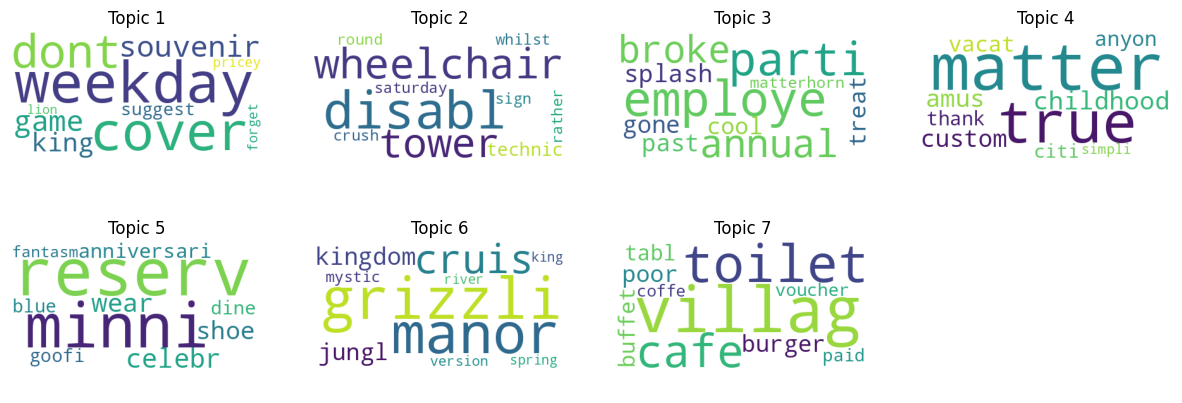

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
plt.show()

Computer the popularity of topics over the entire data set to identify the most popular topics.

In [ ]:
#Compute topic distribution for each review
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all reviews
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

array([0.15145219, 0.13958348, 0.1591692 , 0.1607324 , 0.13206243,
       0.12339158, 0.13360872])

Visualize the topic distribution using bar chart

In [ ]:
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

Based on the LDA topic modeling results, the primary concerns and interests of customers when visiting theme parks can be summarized as follows:

1.	Weekday Visits and Souvenirs (Topic 1):
Customers discuss visiting on weekdays, purchasing souvenirs, and engaging in games, suggesting interest in the best times to visit and the availability of themed merchandise and activities.

2.	Accessibility and Facilities (Topic 2):
Discussions about disability access, wheelchair facilities, and specific attractions like towers indicate concerns about park accessibility and the need for accommodating facilities.

3.	Employee Interactions and Events (Topic 3):
Topics include employee interactions, annual events, and specific experiences like splash parties, highlighting the importance of staff behavior and special events in customer satisfaction.

4.	Memorable Experiences (Topic 4):
Words like "true," "childhood," and "custom" point to customers valuing authentic, nostalgic, and personalized experiences.

5.	Reservations and Character Interactions (Topic 5):
Interest in making reservations, meeting characters like Minnie Mouse, and celebrating special occasions is evident, showing the demand for organized visits and character engagements.

6.	Attractions and Thematic Areas (Topic 6):
Discussions about attractions like the Grizzly Manor and themed areas such as the jungle indicate a focus on the park's diverse attractions and immersive environments.

7.	Amenities and Dining Options (Topic 7):
Concerns about amenities like toilets, cafes, and food quality (e.g., burgers) reflect the importance of basic facilities and dining experiences.


#### Part F

Topic Probabilities by Reviewer Country

In [ ]:
import numpy as np

Selected_Countries = ['United States','United Kingdom']

Group_Prob = []
for i in range(len(Selected_Countries)):
    ReducedTerm_Selected = ReducedCount[np.where(df['Reviewer_Location'] == Selected_Countries[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc)))


#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Distributions by Reviewer Country', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(len(Selected_Countries)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Countries[i])

pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();

U.S. visitors show higher interest in topics such as employee interactions (Topic 3), reserving spots (Topic 5), and specific themes like "Grizzly" and "Manor" (Topic 6). This might reflect a focus on service quality, advance planning, and specific attractions or themes.

In contrast, U.K. visitors emphasize disability access and wheelchair availability (Topic 2), as well as amenities like toilets and village areas (Topic 7). This indicates a concern for accessibility and basic facilities.

Potential reasons for these differences could include cultural priorities, with U.K. visitors possibly placing more emphasis on practical aspects and accessibility, while U.S. visitors might prioritize the overall experience and specific attractions.

#### Selecting Topic Number

In [ ]:
#This only needs to run once to install Gensim package
#Make sure that your computer is connected to the Internet
!pip install Cython
!pip install gensim

Data Preperation

In [ ]:
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)

CLEANED TEXT NEW: 


Next, construct a term dictionary following required format of LDA module in `gensim` library:

In [ ]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

{'chair': 0, 'entri': 1, 'exit': 2, 'experienc': 3, 'overwhelm': 4, 'past': 5, 'upon': 6, 'wheel': 7, 'worst': 8, 'activ': 9, 'electr': 10, 'finish': 11, 'midnight': 12, 'older': 13, 'worthwhil': 14, 'along': 15, 'anim': 16, 'behind': 17, 'boyfriend': 18, 'breathtak': 19, 'buffet': 20, 'celebr': 21, 'decemb': 22, 'diamond': 23, 'fave': 24, 'fill': 25, 'funni': 26, 'goofi': 27, 'imagin': 28, 'immacul': 29, 'kitchen': 30, 'memor': 31, 'mermaid': 32, 'movi': 33, 'music': 34, 'play': 35, 'prior': 36, 'reserv': 37, 'scene': 38, 'shape': 39, 'simpli': 40, 'thrown': 41, 'togeth': 42, 'advanc': 43, 'grand': 44, 'navig': 45, 'notic': 46, 'premium': 47, 'repair': 48, 'valu': 49, 'action': 50, 'addit': 51, 'advic': 52, 'ahead': 53, 'albeit': 54, 'altern': 55, 'continu': 56, 'depend': 57, 'dole': 58, 'exist': 59, 'featur': 60, 'follow': 61, 'hand': 62, 'idea': 63, 'keen': 64, 'luck': 65, 'maximis': 66, 'rout': 67, 'technic': 68, 'tiki': 69, 'toward': 70, 'variou': 71, 'wave': 72, 'whip': 73, 'word

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2)], [(5, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(43, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1)], [(61, 1), (75, 1), (76, 1), (77, 1)], [], [(40, 1), (61, 1), (70, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 2), (87, 2), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103,

Gensim LDA Model

Construct LDA model using `gensim` library:

In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.016*"cafe" + 0.013*"lightyear" + 0.011*"fantasyland" + 0.010*"flight" + '
  '0.009*"buffet" + 0.009*"frontierland" + 0.008*"manor" + 0.007*"centr" + '
  '0.007*"snow" + 0.007*"highlight"'),
 (1,
  '0.027*"tower" + 0.018*"terror" + 0.011*"averag" + 0.010*"peak" + '
  '0.010*"valu" + 0.009*"slot" + 0.009*"voucher" + 0.009*"hollywood" + '
  '0.007*"onlin" + 0.006*"straight"'),
 (2,
  '0.015*"europ" + 0.015*"greet" + 0.013*"minni" + 0.013*"sign" + '
  '0.011*"illumin" + 0.010*"round" + 0.010*"autograph" + 0.008*"european" + '
  '0.007*"chip" + 0.007*"donald"'),
 (3,
  '0.025*"franc" + 0.012*"lion" + 0.011*"kingdom" + 0.009*"design" + '
  '0.009*"tokyo" + 0.009*"similar" + 0.009*"king" + 0.008*"version" + '
  '0.008*"comparison" + 0.007*"polit"'),
 (4,
  '0.025*"toilet" + 0.023*"english" + 0.011*"custom" + 0.010*"speak" + '
  '0.010*"burger" + 0.010*"facil" + 0.008*"whilst" + 0.008*"york" + '
  '0.007*"basic" + 0.007*"obvious"'),
 (5,
  '0.016*"laser" + 0.014*"music" + 0.014*"outl

Compute topic coherence sore:

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require
# text input format (Cleaned_doc_new) instead of bag of word
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5539988712886572


Experiment with Topic Numbers

We construct multiple LDA modles with varied numbers of topics and evaluate their coherence score. Coherence score is a scale from 0 to 1 in which a good coherence (high similarity) has a score of 1, and a bad coherence (low similarity) has a score of 0 [11].(Exploring Coherence Metrics,2024)

In [ ]:
#Evaluation models with topics numbers from 2 to 26
Topics = list(range(2,26,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.6959397104773359
Topic Number: 3 -- Coherence: 0.6634004423345523
Topic Number: 4 -- Coherence: 0.6600392100219874
Topic Number: 5 -- Coherence: 0.608222048292981
Topic Number: 6 -- Coherence: 0.5939928937977957
Topic Number: 7 -- Coherence: 0.6009942644230658
Topic Number: 8 -- Coherence: 0.5864292729843952
Topic Number: 9 -- Coherence: 0.5815291422703928
Topic Number: 10 -- Coherence: 0.5539988712886572
Topic Number: 11 -- Coherence: 0.5601736996557874
Topic Number: 12 -- Coherence: 0.5499965502933902
Topic Number: 13 -- Coherence: 0.5591800786463943
Topic Number: 14 -- Coherence: 0.5544377130415179
Topic Number: 15 -- Coherence: 0.5267976246015583
Topic Number: 16 -- Coherence: 0.5395887283806607
Topic Number: 17 -- Coherence: 0.51599979878508
Topic Number: 18 -- Coherence: 0.4943098124534148
Topic Number: 19 -- Coherence: 0.5087343968018864
Topic Number: 20 -- Coherence: 0.4766434227671132
Topic Number: 21 -- Coherence: 0.5109482340347025
Topic Numbe

Plot the coherence scores for the ease of interpretation.

Text(0, 0.5, 'Coherence')

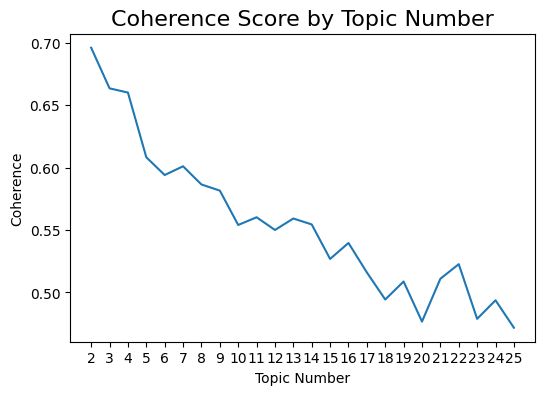

In [ ]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

The Best Model

Extract and analyze the best LDA model.

In [ ]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(0,
  '0.006*"english" + 0.005*"cafe" + 0.005*"lightyear" + 0.004*"manor" + 0.004*"round" + 0.004*"snow" + 0.004*"buffet" + 0.004*"spectacular" + 0.004*"play" + 0.004*"burger"'),
 (1,
  '0.005*"toilet" + 0.005*"poor" + 0.004*"paid" + 0.004*"tower" + 0.004*"villag" + 0.004*"custom" + 0.004*"given" + 0.003*"sign" + 0.003*"disabl" + 0.003*"wast"')]

After our analysis, we have selected 7 as the topic number as it has high coherence score while providing enough detail to differentiate between the specific interests and concerns. Seven topics provided a more interpretable and meaningful distinction between different themes compared to a higher or lower number of topics.

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

**Recommendations for Business Improvement:**

1. **Targeted Marketing:**
   - California: Focus marketing efforts on the U.S. audience, emphasizing summer promotions.
   - Hong Kong: Develop campaigns targeting diverse Asian countries, highlighting accessibility and diverse attractions.
   - Paris: Strengthen ties with U.K. visitors, promoting unique European experiences and convenient travel packages.

2. **Operational Adjustments:**
   - **Peak Season Management:** Prepare for increased domestic visitor traffic during summer, and international traffic in late summer and early fall in California. This involves staff scheduling, inventory management, and capacity planning.
   - **Accessibility Enhancements:** Invest in improving accessibility features, particularly in Hong Kong and Paris, to address the needs of visitors with disabilities.
   - **Service Training:** Enhance employee training programs to improve interactions, as customer satisfaction is closely linked to staff behavior.

3. **Customer Experience Improvements:**
   - **Facility Upgrades:** Prioritize maintenance and upgrades of basic amenities like toilets and dining areas to meet customer expectations, particularly in Hong Kong and Paris.
   - **Special Events and Reservations:** Promote advance reservations and special event planning to cater to visitors' interest in organized visits and celebrations, especially in California.

By implementing these recommendations, the theme parks can enhance visitor satisfaction, attract more diverse demographics, and optimize operations for peak seasons, ultimately driving higher customer loyalty and business growth.



### References:

Amazon. (2023). What is Sentiment Analysis? - Sentiment Analysis Explained - AWS. Amazon Web Services, Inc. https://aws.amazon.com/what-is/sentiment-analysis/#:~:text=Sentiment%20analysis%20is%20the%20process

‌Blei, D., Ng, A., & Jordan, M. (2003). Latent Dirichlet Allocation. Journal of Machine Learning Research, 3, 993–1022. https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

‌Pickett, M., Cline, D., & Ryan, J. (n.d.). Exploring Coherence Metrics for Optimizing Topic Models of Humpback Song. Retrieved August 7, 2024, from https://www.mbari.org/wp-content/uploads/Pickett.pdf

‌What Is Sentiment Analysis? | IBM. (2023, August 24). Ibm.com. https://www.ibm.com/topics/sentiment-analysis#:~:text=The%20three%20most%20popular%20types

K. Ezzameli, & Hela Mahersia. (2023). Emotion recognition from unimodal to multimodal analysis: A review. Information Fusion, 101847–101847. https://doi.org/10.1016/j.inffus.2023.101847

‌